In [144]:
import pandas as pd

In [145]:
df_data_raw = pd.read_excel("C:\\Users\\61410\\Downloads\\Final_project_RFM\\Final_project_RFM\\ecommerce retail.xlsx",sheet_name=0)

In [98]:
df_data = df_data_raw.dropna()
df_data = df_data.drop_duplicates()
df_data['CustomerID']= df_data['CustomerID'].astype('int')
df_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [99]:
#Calculate R,F,M for each customer
#For R 
# most recent purchase per country based on invoice date
df_data['InvoiceDate']= pd.to_datetime(df_data['InvoiceDate'])
r_total = df_data[['CustomerID','InvoiceDate','InvoiceNo']]
r_total_sort = r_total.sort_values(by = 'InvoiceDate',ascending= False)
r_total_sort.head()


,CustomerID,InvoiceDate,InvoiceNo
541908,12680,2011-12-09 12:50:00,581587
541901,12680,2011-12-09 12:50:00,581587
541895,12680,2011-12-09 12:50:00,581587
541896,12680,2011-12-09 12:50:00,581587
541897,12680,2011-12-09 12:50:00,581587


In [116]:
#latest purchase
r_total_sort['lastest_purchase'] = r_total_sort.groupby(['CustomerID','InvoiceNo'])['InvoiceDate'].rank(method='dense',ascending=False)
latest_purchase = r_total_sort
latest_purchase = latest_purchase.drop_duplicates()
latest_purchase

,CustomerID,InvoiceDate,InvoiceNo,lastest_purchase,r_score
541908,12680,2011-12-09 12:50:00,581587,1.0,5
541892,13113,2011-12-09 12:49:00,581586,1.0,5
541879,15804,2011-12-09 12:31:00,581585,1.0,5
541868,13777,2011-12-09 12:25:00,581584,1.0,5
541866,13777,2011-12-09 12:23:00,581583,1.0,5
...,...,...,...,...,...
25,13047,2010-12-01 08:35:00,536369,1.0,1
12,13047,2010-12-01 08:34:00,536367,1.0,1
21,13047,2010-12-01 08:34:00,536368,1.0,1
8,17850,2010-12-01 08:28:00,536366,1.0,1


In [117]:
#assign lastest purchase score
latest_purchase['r_score'] = pd.qcut(latest_purchase['InvoiceDate'],q=5,labels=[1,2,3,4,5])
latest_purchase

C:\Users\61410\AppData\Local\Temp/ipykernel_23716/2173936912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_purchase['r_score'] = pd.qcut(latest_purchase['InvoiceDate'],q=5,labels=[1,2,3,4,5])


,CustomerID,InvoiceDate,InvoiceNo,lastest_purchase,r_score
541908,12680,2011-12-09 12:50:00,581587,1.0,5
541892,13113,2011-12-09 12:49:00,581586,1.0,5
541879,15804,2011-12-09 12:31:00,581585,1.0,5
541868,13777,2011-12-09 12:25:00,581584,1.0,5
541866,13777,2011-12-09 12:23:00,581583,1.0,5
...,...,...,...,...,...
25,13047,2010-12-01 08:35:00,536369,1.0,1
12,13047,2010-12-01 08:34:00,536367,1.0,1
21,13047,2010-12-01 08:34:00,536368,1.0,1
8,17850,2010-12-01 08:28:00,536366,1.0,1


In [118]:
#For F 
#numbers of purchase
f_total = df_data[['InvoiceNo','CustomerID']]
total_purchase = f_total.groupby('CustomerID').nunique('InvoiceNo')
total_purchase

,InvoiceNo
CustomerID,
12346,2
12347,7
12348,4
12349,1
12350,1
...,...
18280,1
18281,1
18282,3


In [119]:
#f_score
total_purchase['f_score'] = pd.qcut(total_purchase['InvoiceNo'],q=6,labels = [1,2,3,4,5],duplicates='drop')
total_purchase

,InvoiceNo,f_score
CustomerID,,
12346,2,1
12347,7,4
12348,4,3
12349,1,1
12350,1,1
...,...,...
18280,1,1
18281,1,1
18282,3,2


In [120]:
#m score
df_data['price_per_trans'] = df_data['Quantity'] * df_data['UnitPrice']
df_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_per_trans
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [121]:
#total revenue per customer
revenue = df_data.groupby('CustomerID')['price_per_trans'].sum().reset_index()
revenue = revenue.rename(columns={'price_per_trans' : 'TotalRevenuePerCus'})
revenue

,CustomerID,TotalRevenuePerCus
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2045.53


In [122]:
# m score
revenue['m_score'] = pd.qcut(revenue['TotalRevenuePerCus'],q=5,labels= [1,2,3,4,5])
revenue

,CustomerID,TotalRevenuePerCus,m_score
0,12346,0.00,1
1,12347,4310.00,5
2,12348,1797.24,4
3,12349,1757.55,4
4,12350,334.40,2
...,...,...,...
4367,18280,180.60,1
4368,18281,80.82,1
4369,18282,176.60,1
4370,18283,2045.53,5


In [123]:
#rfm score
f_and_m = pd.merge(revenue,total_purchase, how = 'inner', on = ['CustomerID'])
rfm = pd.merge(f_and_m,latest_purchase,how= 'left', on = ['CustomerID'])
# rfm = rfm[['CustomerID','r_score','f_score','m_score']]
# rfm['r_score'] = rfm['r_score'].astype(int)
# rfm['f_score'] = rfm['f_score'].astype(int)
# rfm['m_score'] = rfm['m_score'].astype(int)
# rfm.head()
f_and_m

,CustomerID,TotalRevenuePerCus,m_score,InvoiceNo,f_score
0,12346,0.00,1,2,1
1,12347,4310.00,5,7,4
2,12348,1797.24,4,4,3
3,12349,1757.55,4,1,1
4,12350,334.40,2,1,1
...,...,...,...,...,...
4367,18280,180.60,1,1,1
4368,18281,80.82,1,1,1
4369,18282,176.60,1,3,2
4370,18283,2045.53,5,16,5


In [125]:
#upload segmentation 
seg = pd.read_excel("C:\\Users\\61410\\Downloads\\Final_project_RFM\\Final_project_RFM\\ecommerce retail.xlsx",sheet_name='Segmentation')
print(seg.head())

              Segment                                          RFM Score
0           Champions                  555, 554, 544, 545, 454, 455, 445
1               Loyal             543, 444, 435, 355, 354, 345, 344, 335
2  Potential Loyalist  553, 551, 552, 541, 542, 533, 532, 531, 452, 4...
3       New Customers                  512, 511, 422, 421, 412, 411, 311
4           Promising  525, 524, 523, 522, 521, 515, 514, 513, 425,42...


In [126]:
seg['rfm_score_convert'] = seg['RFM Score'].str.split(',')
seg

,Segment,RFM Score,rfm_score_convert
0,Champions,"555, 554, 544, 545, 454, 455, 445","[555, 554, 544, 545, 454, 455, 445]"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335","[543, 444, 435, 355, 354, 345, 344, 335]"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4...","[553, 551, 552, 541, 542, 533, 532, 531..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311","[512, 511, 422, 421, 412, 411, 311]"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42...","[525, 524, 523, 522, 521, 515, 514, 513..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324","[535, 534, 443, 434, 343, 334, 325, 324]"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251","[331, 321, 312, 221, 213, 231, 241, 251]"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2...","[255, 254, 245, 244, 253, 252, 243, 242..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113","[155, 154, 144, 214, 215, 115, 114, 113]"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2...","[332, 322, 233, 232, 223, 222, 132, 123..."


In [127]:
seg_convert = seg.explode('rfm_score_convert')
seg_convert

,Segment,RFM Score,rfm_score_convert
0,Champions,"555, 554, 544, 545, 454, 455, 445",555
0,Champions,"555, 554, 544, 545, 454, 455, 445",554
0,Champions,"555, 554, 544, 545, 454, 455, 445",544
0,Champions,"555, 554, 544, 545, 454, 455, 445",545
0,Champions,"555, 554, 544, 545, 454, 455, 445",454
...,...,...,...
10,Lost customers,"111, 112, 121, 131,141,151",112
10,Lost customers,"111, 112, 121, 131,141,151",121
10,Lost customers,"111, 112, 121, 131,141,151",131
10,Lost customers,"111, 112, 121, 131,141,151",141


In [128]:
cus_seg = pd.merge(rfm,seg_convert,how= 'inner',left_on= 'rfm_total_score',right_on= 'rfm_score_convert')
cus_seg
                   

,CustomerID,TotalRevenuePerCus,m_score,InvoiceNo_x,f_score,InvoiceDate,InvoiceNo_y,lastest_purchase,r_score,rfm_total_score,Segment,RFM Score,rfm_score_convert
0,12346,0.00,1,2,1,2011-01-18 10:17:00,C541433,1.0,1,111,Lost customers,"111, 112, 121, 131,141,151",111
1,12346,0.00,1,2,1,2011-01-18 10:01:00,541431,1.0,1,111,Lost customers,"111, 112, 121, 131,141,151",111
2,12361,189.90,1,1,1,2011-02-25 13:51:00,545017,1.0,1,111,Lost customers,"111, 112, 121, 131,141,151",111
3,12401,84.30,1,1,1,2011-02-09 13:50:00,543537,1.0,1,111,Lost customers,"111, 112, 121, 131,141,151",111
4,12402,225.60,1,1,1,2011-01-20 13:49:00,541675,1.0,1,111,Lost customers,"111, 112, 121, 131,141,151",111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,17323,894.44,3,9,5,2011-11-24 17:14:00,C578669,1.0,5,553,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4...",553
7303,17323,894.44,3,9,5,2011-11-20 12:13:00,577493,1.0,5,553,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4...",553
7304,17888,515.73,3,10,5,2011-11-21 10:18:00,C577614,1.0,5,553,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4...",553
7305,17888,515.73,3,10,5,2011-11-18 13:45:00,577322,1.0,5,553,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4...",553


In [129]:
#visualise how many customer per seg

cus_per_seg = cus_seg.groupby('Segment').nunique('CustomerID').reset_index()
cus_per_seg = cus_per_seg.rename(columns={'CustomerID': 'Total_customer'})
cus_per_seg = cus_per_seg[['Segment','Total_customer']]
cus_per_seg

,Segment,Total_customer
0,About To Sleep,7
1,At Risk,480
2,Cannot Lose Them,456
3,Champions,473
4,Hibernating customers,21
5,Lost customers,226
6,Loyal,69
7,Need Attention,24
8,New Customers,209
9,Potential Loyalist,5


In [130]:
import matplotlib.pyplot as plt


<Figure size 720x432 with 0 Axes>

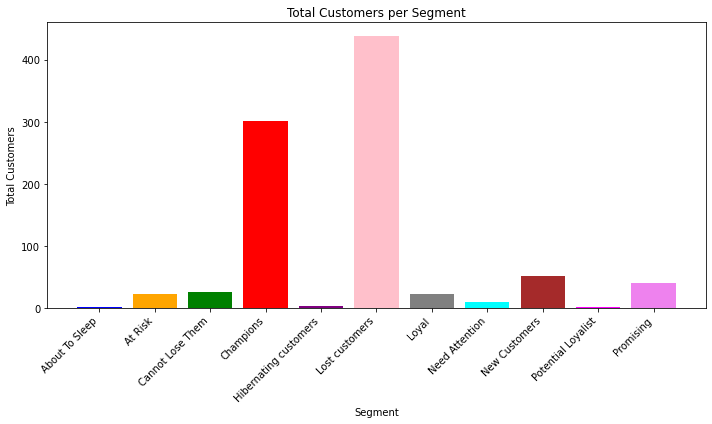

In [198]:

colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink', 'gray', 'cyan', 'brown', 'magenta', 'violet']
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.bar(cus_per_seg['Segment'], cus_per_seg['Total_customer'], color=colors)
plt.xlabel('Segment')
plt.ylabel('Total Customers')
plt.title('Total Customers per Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [131]:
#analyse based on country
cus_seg_group = pd.merge(cus_seg,df_data,how='inner',on = ['CustomerID'])
cus_seg_country = cus_seg_group.groupby(['Country', 'Segment'])['CustomerID'].nunique().reset_index()
cus_seg_country = cus_seg_country.rename(columns={'CustomerID': 'Total_customer_per_country'})
cus_seg_country = cus_seg_country[['Country','Segment','Total_customer_per_country']]
cus_seg_country

,Country,Segment,Total_customer_per_country
0,Australia,At Risk,2
1,Australia,Cannot Lose Them,2
2,Australia,Champions,2
3,Australia,Lost customers,1
4,Austria,Lost customers,1
...,...,...,...
97,United Kingdom,Loyal,63
98,United Kingdom,Need Attention,16
99,United Kingdom,New Customers,193
100,United Kingdom,Potential Loyalist,5


In [140]:
#analyse based on product
df_data['revenue_per_transaction'] = df_data.UnitPrice * df_data.Quantity
df_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_per_trans,revenue_per_product,revenue_per_transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,10.20,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12.60,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,16.60,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,16.60,16.60


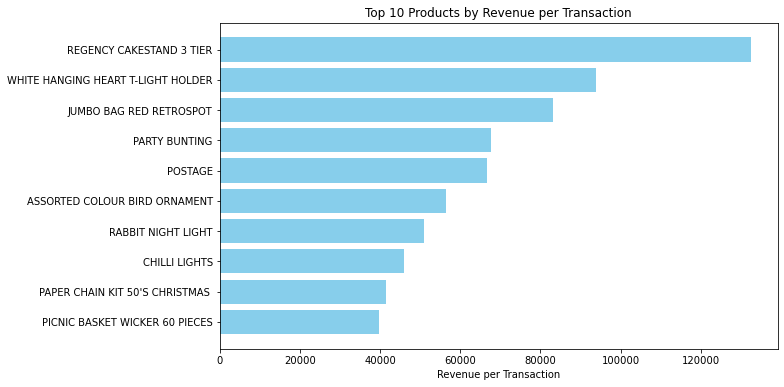

In [143]:
revenue_product = df_data.groupby('Description')['revenue_per_transaction'].sum().reset_index()
df_sorted = revenue_product.sort_values(by='revenue_per_transaction', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Description'][:10], df_sorted['revenue_per_transaction'][:10], color='skyblue')
plt.xlabel('Revenue per Transaction')
plt.title('Top 10 Products by Revenue per Transaction')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [132]:
import seaborn as sns

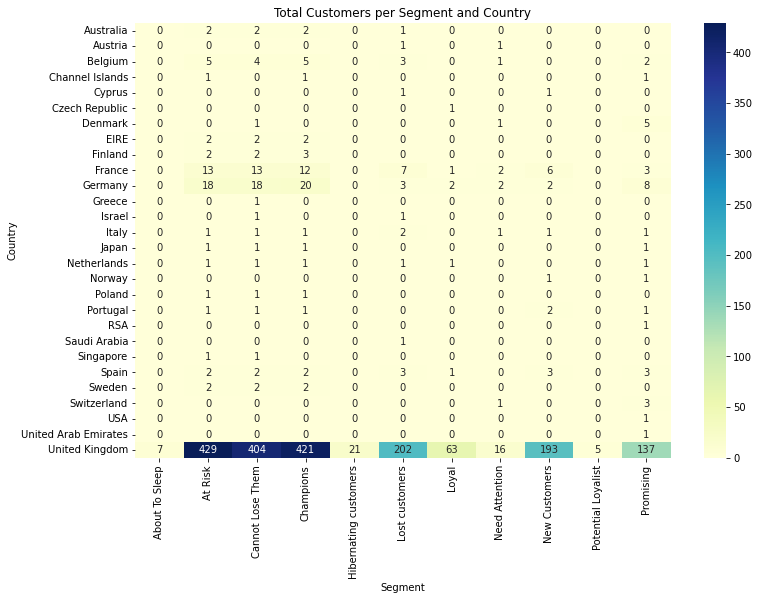

In [133]:
# Create a pivot table to reshape the data for the heatmap
pivot_df = cus_seg_country.pivot_table(index='Country', columns='Segment', values='Total_customer_per_country', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.xlabel('Segment')
plt.ylabel('Country')
plt.title('Total Customers per Segment and Country')
plt.show()

In [134]:
#analyse based on Description

cus_seg_desc = cus_seg_group.groupby(['Description', 'Segment'])['CustomerID'].nunique().reset_index()
cus_seg_desc = cus_seg_desc.rename(columns={'CustomerID': 'Total_customer_per_product'})
cus_seg_desc

,Description,Segment,Total_customer_per_product
0,4 PURPLE FLOCK DINNER CANDLES,About To Sleep,1
1,4 PURPLE FLOCK DINNER CANDLES,At Risk,5
2,4 PURPLE FLOCK DINNER CANDLES,Cannot Lose Them,5
3,4 PURPLE FLOCK DINNER CANDLES,Champions,5
4,4 PURPLE FLOCK DINNER CANDLES,Loyal,2
...,...,...,...
20399,ZINC WIRE KITCHEN ORGANISER,Champions,5
20400,ZINC WIRE SWEETHEART LETTER TRAY,At Risk,5
20401,ZINC WIRE SWEETHEART LETTER TRAY,Cannot Lose Them,7
20402,ZINC WIRE SWEETHEART LETTER TRAY,Champions,7


In [135]:
#products attract Champions,Loyal and Potential Loyal
target_segments = ['Champions', 'Loyal', 'Potential Loyalist']
cus_seg_desc_top = cus_seg_desc[cus_seg_desc['Segment'].isin(target_segments)]
cus_seg_desc_top

,Description,Segment,Total_customer_per_product
3,4 PURPLE FLOCK DINNER CANDLES,Champions,5
4,4 PURPLE FLOCK DINNER CANDLES,Loyal,2
8,50'S CHRISTMAS GIFT BAG LARGE,Champions,33
9,50'S CHRISTMAS GIFT BAG LARGE,Loyal,2
15,DOLLY GIRL BEAKER,Champions,45
...,...,...,...
20391,ZINC WILLIE WINKIE CANDLE STICK,Champions,37
20393,ZINC WILLIE WINKIE CANDLE STICK,Loyal,3
20399,ZINC WIRE KITCHEN ORGANISER,Champions,5
20402,ZINC WIRE SWEETHEART LETTER TRAY,Champions,7


In [136]:
top_product = cus_seg_desc_top.groupby('Description')['Total_customer_per_product'].sum().reset_index()
top_product

,Description,Total_customer_per_product
0,4 PURPLE FLOCK DINNER CANDLES,7
1,50'S CHRISTMAS GIFT BAG LARGE,35
2,DOLLY GIRL BEAKER,45
3,I LOVE LONDON MINI BACKPACK,23
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3629,ZINC T-LIGHT HOLDER STARS SMALL,63
3630,ZINC TOP 2 DOOR WOODEN SHELF,4
3631,ZINC WILLIE WINKIE CANDLE STICK,40
3632,ZINC WIRE KITCHEN ORGANISER,5


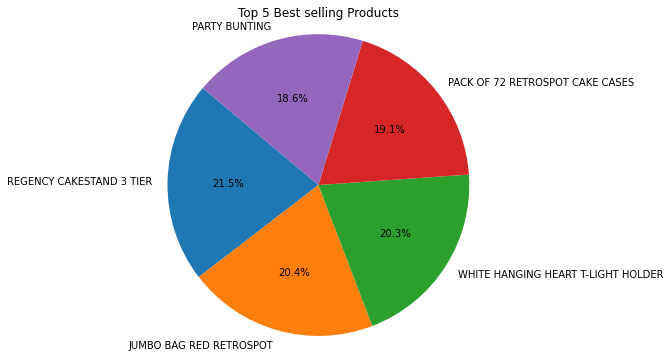

In [137]:
most_popular = top_product.sort_values(by='Total_customer_per_product', ascending=False)
most_popular = most_popular.head(5)
plt.figure(figsize=(6, 6))
plt.pie(most_popular['Total_customer_per_product'], labels=most_popular['Description'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Best selling Products')

plt.axis('equal') 

plt.show()


In [ ]:
#recommendations for marketing team
#focus more on UK market: most valuable market
#focus more on the top 5 products
#R,F,M score should be concerned equally